# Лабораторная работа №2. Случайные величины. Нормальный закон распределения. Моменты и критические границы случайной величины
**Выполнил:** Шарыкин Александр Викторович  
В качестве источника данных использовался сборник Росстата "Регионы России. Социально-экономические показатели" (https://rosstat.gov.ru/folder/210/document/47652)

In [2]:
import pandas as pd
from pandas import ExcelFile
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm

## Часть 1
В качестве примера непрерывного признака, имеющего нормальное распределение, возьмём **"потребление молока и молочных продуктов на душу населения (кг)"**   
Этот признак непрерывный, так как он относительный (на душу населения), кроме того, единицы измерения массы являются бесконечно делимыми

In [4]:
xlsx = ExcelFile("Razdel 3 - Uroven zhizni.xlsx")
df = pd.read_excel(xlsx, sheet_name="3.22.")

# Приведём данные к анализируемому виду
first_row_num = df[df[df.columns[0]] == "Белгородская область"].index[0]
last_row_num = df[df[df.columns[0]] == "Чукотский автономный округ"].index[0]
df = df.iloc[first_row_num:last_row_num+1]
df = df[~df[df.columns[0]].isin(["Архангельская область", "Тюменская область", "в том числе:"])]
df = df[~df[df.columns[0]].str.contains("федеральный округ")]
df = df[[df.columns[0], df.columns[-1]]]
df = df.set_axis(["Регион", "Значение в 2022"], axis=1)
df = df.reset_index(drop=True).dropna()
df

,Регион,Значение в 2022
0,Белгородская область,269.0
1,Брянская область,190.0
2,Владимирская область,216.0
3,Воронежская область,293.0
4,Ивановская область,195.0
...,...,...
75,Амурская область,204.0
76,Магаданская область,261.0
77,Сахалинская область,154.0
78,Еврейская автономная область,190.0


Найдём для нашего признака значения статистических показателей:

In [5]:
col = df["Значение в 2022"]
mean = round(col.mean(), 2)
var = round(col.var(), 2)
std = round(col.std(), 2)
skew = round(col.skew(), 2)
kurtosis = round(col.kurtosis(), 2)
q_005 = round(col.quantile(0.05), 2)
q_095 = round(col.quantile(0.95), 2)
print(f"Среднее (мат. ожидание): {mean}")
print(f"Дисперсия: {var}")
print(f"Стандартное отклонение: {std}")
print(f"Асимметрия: {skew}")
print(f"Эксцесс: {kurtosis}")
print(f"Квантиль уровня 0,05: {q_005}")
print(f"Квантиль уровня 0,95: {q_095}")

Среднее (мат. ожидание): 231.46
Дисперсия: 2006.63
Стандартное отклонение: 44.8
Асимметрия: -0.17
Эксцесс: 0.48
Квантиль уровня 0,05: 153.9
Квантиль уровня 0,95: 298.05


По отрицательному значению коэффициента асимметрии можно сказать, что у признака наблюдается очень небольшая левосторонняя асимметрия.  
Из положительного значения коэффициента эксцесса следует, что пик распределения признака немного более острый, чем у нормального.  
Построим гистограмму распределения признака и сопоставим её с функцией плотности нормального распределения  `N(231.46, 2006.63)`

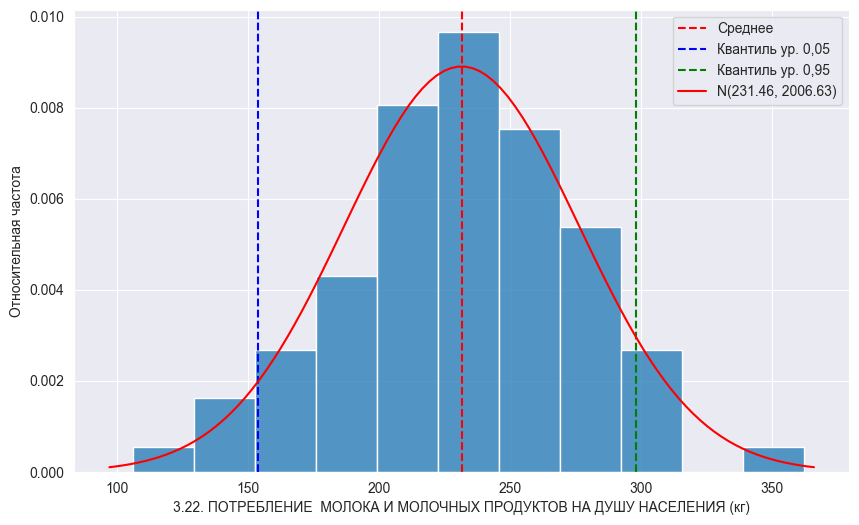

In [6]:
# Сгенерируем координаты графика функции плотности
x = np.linspace(mean - 3 * std, mean + 3 * std, 100)
y = norm.pdf(x, mean, std)

plt.figure(figsize=(10, 6))
sns.histplot(col, bins=11, stat="density")
plt.ylabel("ОТНОСИТЕЛЬНАЯ ЧАСТОТА")
plt.xlabel("3.22. ПОТРЕБЛЕНИЕ  МОЛОКА И МОЛОЧНЫХ ПРОДУКТОВ НА ДУШУ НАСЕЛЕНИЯ (кг)")
plt.axvline(mean, color="red", linestyle="dashed", label=f"Среднее")
plt.axvline(q_005, color="blue", linestyle="dashed", label=f"Квантиль ур. 0,05")
plt.axvline(q_095, color="green", linestyle="dashed", label=f"Квантиль ур. 0,95")
plt.plot(x, y, 'r-', label=f"N({mean}, {var})")
plt.legend()
plt.show()

Как видно по графику, распределение признака действительно близко к нормальному

## Часть 2
Возьмём найденный в прошлой лабораторной работе нормально распределённый признак **"удельный вес городского населения в общей численности населения (%)"**

In [7]:
xlsx = ExcelFile("Razdel 1 - Naselenie.xlsx")
df = pd.read_excel(xlsx, sheet_name="1.3.")

# Приведём данные к анализируемому виду
first_row_num = df[df[df.columns[0]] == "Белгородская область"].index[0]
last_row_num = df[df[df.columns[0]] == "Чукотский автономный округ"].index[0]
df = df.iloc[first_row_num:last_row_num+1]
df = df[~df[df.columns[0]].isin(["Архангельская область", "Тюменская область", "в том числе:"])]
df = df[~df[df.columns[0]].str.contains("федеральный округ")]
df = df[[df.columns[0], df.columns[-1]]]
df = df.set_axis(["Регион", "Значение в 2022"], axis=1)
df = df.reset_index(drop=True).dropna()
df

,Регион,Значение в 2022
0,Белгородская область,65.4
1,Брянская область,69.6
2,Владимирская область,77.6
3,Воронежская область,68.5
4,Ивановская область,82.1
...,...,...
80,Амурская область,68.4
81,Магаданская область,96.5
82,Сахалинская область,82.6
83,Еврейская автономная область,70.8


Рассчитаем значения статистических показателей:

In [8]:
col = df["Значение в 2022"]
mean = round(col.mean(), 2)
var = round(col.var(), 2)
std = round(col.std(), 2)
skew = round(col.skew(), 2)
kurtosis = round(col.kurtosis(), 2)
q_005 = round(col.quantile(0.05), 2)
q_095 = round(col.quantile(0.95), 2)
print(f"Среднее (мат. ожидание): {mean}")
print(f"Дисперсия: {var}")
print(f"Стандартное отклонение: {std}")
print(f"Асимметрия: {skew}")
print(f"Эксцесс: {kurtosis}")
print(f"Квантиль уровня 0,05: {q_005}")
print(f"Квантиль уровня 0,95: {q_095}")

Среднее (мат. ожидание): 70.9
Дисперсия: 167.68
Стандартное отклонение: 12.95
Асимметрия: -0.46
Эксцесс: 0.93
Квантиль уровня 0,05: 47.4
Квантиль уровня 0,95: 92.44


Здесь также наблюдается левосторонняя асимметрия, но уже более сильная по сравнению с предыдущим  
Пик распределения также более "крутой", чем у предыдущего и нормального  
Построим гистограмму распределения признака и сопоставим её с функцией плотности нормального распределения  `N(70.9, 167.68)`

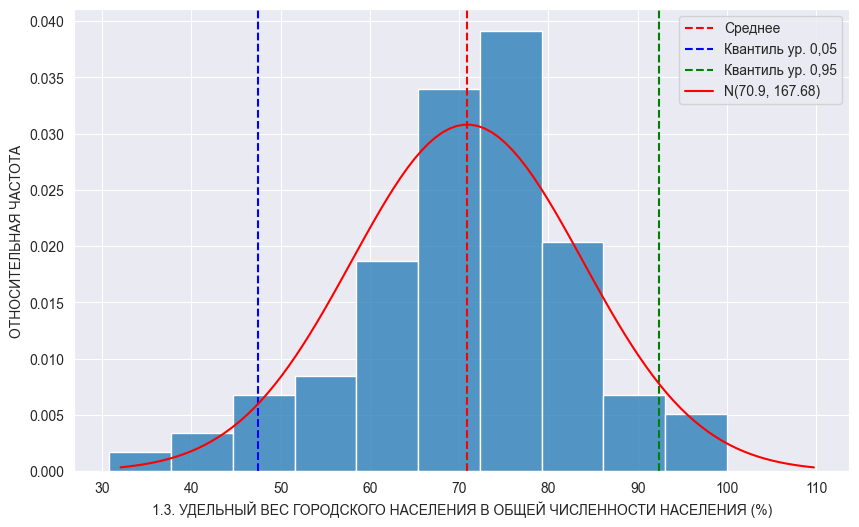

In [11]:
# Сгенерируем координаты графика функции плотности
x = np.linspace(mean - 3 * std, mean + 3 * std, 100)
y = norm.pdf(x, mean, std)

plt.figure(figsize=(10, 6))
sns.histplot(col, bins=10, stat="density")
plt.ylabel("ОТНОСИТЕЛЬНАЯ ЧАСТОТА")
plt.xlabel("1.3. УДЕЛЬНЫЙ ВЕС ГОРОДСКОГО НАСЕЛЕНИЯ В ОБЩЕЙ ЧИСЛЕННОСТИ НАСЕЛЕНИЯ (%)")
plt.axvline(mean, color="red", linestyle="dashed", label=f"Среднее")
plt.axvline(q_005, color="blue", linestyle="dashed", label=f"Квантиль ур. 0,05")
plt.axvline(q_095, color="green", linestyle="dashed", label=f"Квантиль ур. 0,95")
plt.plot(x, y, 'r-', label=f"N({mean}, {var})")
plt.legend()
plt.show()

Как видим, распределение этого признака тоже похоже на нормальное, пусть и чуть менее сильно, чем распределение предыдущего

## Выводы
В ходе лабораторной работы я ещё раз убедился в том, что среди признаков, имеющих относительное выражение, немало тех, чьё распределение напоминает нормальное